<a href="https://colab.research.google.com/github/JagratiTalreja01/Super-Resolution-SRCNN-/blob/main/FSRCNN_Experimental_model_withPSNR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip

--2020-02-14 19:09:27--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip [following]
--2020-02-14 19:09:32--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3530603713 (3.3G) [application/zip]
Saving to: ‘DIV2K_train_HR.zip’

DIV2K_train_HR.zip  100%[===================>]   3.29G  32.3MB/s    in 3m 31s  

2020-02-14 19:13:03 (16.0 MB/s) - ‘DIV2K_train_HR.zip’ saved [3530603713/3530603713]



In [1]:
!git clone https://github.com/niazwazir/SRCNN-Keras.git

fatal: destination path 'SRCNN-Keras' already exists and is not an empty directory.


In [2]:
cd SRCNN-Keras/

/content/SRCNN-Keras


In [3]:
!ls

baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
Brain.jpg
butterfly_GT.bmp
head_GT.bmp
Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
prepare_data.py
project.gif
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
Set5
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
subpixel.py
text
woman_GT.bmp
yang91


In [4]:
!unzip yang91.zip

unzip:  cannot find or open yang91.zip, yang91.zip.zip or yang91.zip.ZIP.


In [5]:
!ls

baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
Brain.jpg
butterfly_GT.bmp
head_GT.bmp
Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
prepare_data.py
project.gif
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
Set5
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
subpixel.py
text
woman_GT.bmp
yang91


In [6]:
!rm -r *.zip

rm: cannot remove '*.zip': No such file or directory


In [7]:
!ls

baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
Brain.jpg
butterfly_GT.bmp
head_GT.bmp
Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
prepare_data.py
project.gif
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
Set5
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
subpixel.py
text
woman_GT.bmp
yang91


In [8]:
cd ..

/content


In [9]:
!ls

sample_data  SRCNN-Keras


In [10]:
!unzip "DIV2K_train_HR.zip"

unzip:  cannot find or open DIV2K_train_HR.zip, DIV2K_train_HR.zip.zip or DIV2K_train_HR.zip.ZIP.


In [11]:
!rm -r *.zip

rm: cannot remove '*.zip': No such file or directory


In [12]:
!ls

sample_data  SRCNN-Keras


In [14]:
############### IF YOU DON'T WANT TO TRAIN :
############### Load my github model and use the output patch prediction and merging code from this same notebook lateron

In [13]:
DATADIR = "SRCNN-Keras/yang91"
DATADIR2 = "SRCNN-Keras/yang91"
#DATADIR2 = "DIV2K_train_HR"


In [14]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [15]:
scale = 2
req_size = 20
inp_size = int(req_size/scale)
stride = 15

X=[]
labels=[]

for filera in os.listdir(DATADIR):
  readpath = os.path.join(DATADIR,filera)
  img = cv2.imread(readpath)
  img = np.asarray(img)
  shapes = img.shape
  for i in range(0, shapes[0]-req_size+1, stride):
    for j in range(0, shapes[1]-req_size+1,stride):
      subimage_HR = img[i:i+req_size, j:j+req_size]
      #cv2_imshow(subimage_HR)
      subimage_LR = cv2.resize(subimage_HR,(inp_size,inp_size))
      X.append(subimage_LR)
      labels.append(subimage_HR)

counta=0
for filera in os.listdir(DATADIR2):
  counta=counta+1
  if(counta==300):
    break
  readpath = os.path.join(DATADIR2,filera)
  img = cv2.imread(readpath)
  img = np.asarray(img)
  shapes = img.shape
  for i in range(0, shapes[0]-req_size+1, stride):
    for j in range(0, shapes[1]-req_size+1,stride):
      subimage_HR = img[i:i+req_size, j:j+req_size]
      #cv2_imshow(subimage_HR)
      subimage_LR = cv2.resize(subimage_HR,(inp_size,inp_size))
      X.append(subimage_LR)
      labels.append(subimage_HR)

In [16]:
X = np.asarray(X)
labels = np.asarray(labels)
print(labels.shape)
print(X.shape)

(37698, 20, 20, 3)
(37698, 10, 10, 3)


In [17]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input,Conv2DTranspose
from tensorflow.keras.layers import DepthwiseConv2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import add, Activation
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD

In [18]:
alpha = 0.85
def basic_mse(y_true, y_pred):
  pred = tf.image.sobel_edges(y_pred)
  true = tf.image.sobel_edges(y_true)
  lossmse = tf.reduce_mean(tf.square(y_pred-y_true))
  lossedge = tf.reduce_mean(tf.square(pred-true))
  return alpha*lossmse + (1-alpha)*lossedge

In [19]:
d=64
s=12
m=3

In [ ]:
def jagrati_model(upscale_factor=2, channels=1):
    
    inputs = keras.Input(shape=(None, None, channels))

    #Block_1
    #Redundant Feature Maps
    C1 = layers.Conv2D(1, 1, padding = 'same')(inputs)
    A1 = Activation('relu', name='act1')(C1)
    #intrinsic Feature Maps
    C2 = layers.Conv2D(1, 1, padding = 'same')(inputs)
    A2 = Activation('relu', name='act2')(C2)
    #Concatenation Layer
    output_img1 = keras.layers.concatenate([A1, A2], axis=1)

    #Block2
    #ResNet Block
    conv1 = Conv2D(filters=1, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu')(output_img1)
    conv2 = Conv2D(filters=1, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='linear')(conv1)
    conv3 = Conv2D(filters=1, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='linear')(conv2)

    out = add(inputs=[output_img1, conv3])
    out = Activation('relu')(out)

    #Block3
    #Redundant Feature Maps
    C3 = Conv2D(1, (1, 1), padding='same', name='CONV2D3')(out)
    A3 = Activation('relu', name='act3')(C3)

    #Intrinsic feature Maps
    C4 = Conv2D(1, (1, 1), padding='same', name='CONV2D4')(out)
    A4 = Activation('relu', name='act4')(C4)

    #Concatenation Layer
    output_img2 = keras.layers.concatenate([A3, A4], axis=-1)
    
    C5 = layers.Conv2D(channels * (upscale_factor ** 2), 3, padding = 'same')(output_img2)
    outputs = tf.nn.depth_to_space(C5, upscale_factor)
    return keras.Model(inputs, outputs)

model = jagrati_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 1)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   2           ['input_1[0][0]']                
                                1)                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, None, None,   2           ['input_1[0][0]']                
                                1)                                                            

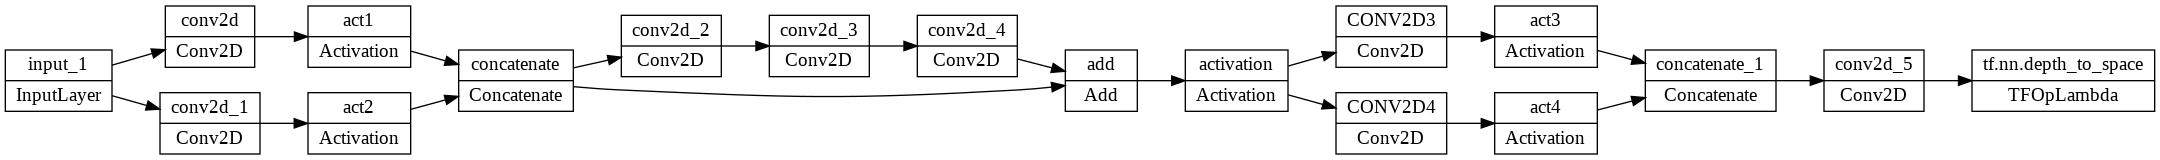

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96)

In [20]:
import os
import cv2
import keras
import numpy as np
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input,Conv2DTranspose, Add, Activation, LeakyReLU

In [31]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Input, Concatenate, BatchNormalization, Add
from keras.layers import Conv2D, MaxPooling2D, ReLU
from keras import backend as K

In [32]:
def my_model():

  x0 = tf.keras.layers.Input(shape=(None,None,3))
  x23 = Conv2D(16, (3,3),strides=(1,1), padding='same')(x0)
  A1 = Activation('relu', name='act1')(x23)
  x24 = Conv2D(16, (3,3),strides=(1,1), padding='same')(A1)

  x20 = Conv2D(16, (3,3),strides=(1,1), padding='same')(x0)
  A2 = Activation('relu', name='act2')(x20)
  x21 = Conv2D(16, (3,3),strides=(1,1), padding='same')(A2)

  x18 = Conv2D(16, (3,3),strides=(1,1), padding='same')(x0)
  A3 = Activation('relu', name='act3')(x18)
  x19 = Conv2D(16, (3,3),strides=(1,1), padding='same')(A3)
  
  #output
  x22 = Add()([x19, x21, x24])
  return x22


model = Model(inputs=x0 , outputs = x22)
model.summary()

  

NameError: ignored

In [ ]:
d=64
s=12
m=3

inputlayer = tf.keras.layers.Input(shape=(None,None,3))
x = Conv2D(filters=d, strides=(1,1), kernel_size=7 ,padding="same")(inputlayer)
x = LeakyReLU(alpha=0.2)(x)

#the layer to reduce feature maps from d to s
x = Conv2D(filters=s, kernel_size=(1, 1),padding="same")(x)

x = LeakyReLU(alpha=0.2)(x)

#the middle m layers
for i in range(m):
  x = Conv2D(filters=s,kernel_size=(3, 3),padding="same")(x)
  x = LeakyReLU(alpha=0.1)(x)

x = Conv2D(filters=d, kernel_size=(1, 1), padding="same")(x)
x = LeakyReLU(alpha=0.1)(x)


#final expanding layer of the model 3 channels for RGB
y = Conv2DTranspose(filters=3, kernel_size = (9,9), strides = (scale,scale), padding="same",activation=None)(x)

model = Model(inputs=inputlayer , outputs = y)

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD

ImportError: ignored

In [ ]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 256, 256, 64  256         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_5 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d_4[0][0]',               
                                )                                 'activation_8[0][0]',     

In [ ]:
checkpoint = ModelCheckpoint('best_model_improved.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [ ]:
history = model.fit(X,labels,batch_size=32,shuffle=True,validation_split=0.01 ,epochs=10,callbacks=[checkpoint],
                    verbose=1 )

Epoch 1/10


ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Loss Curves')

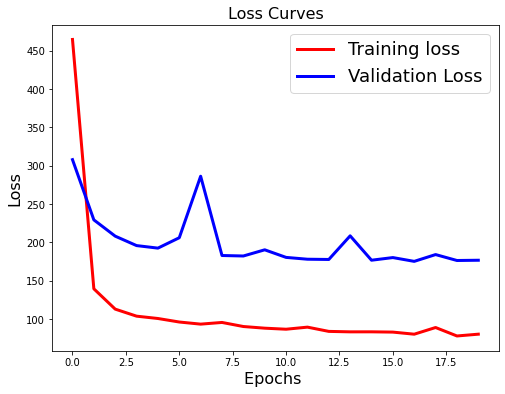

In [ ]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

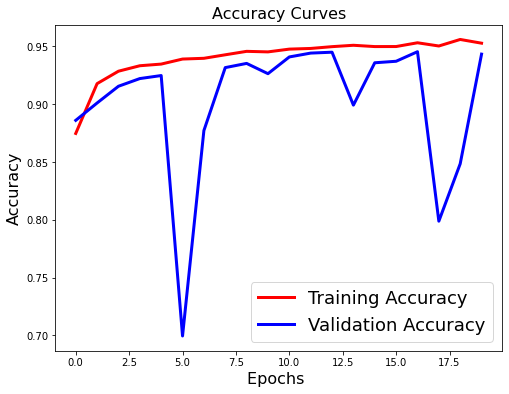

In [ ]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
!ls

best_model_improved.h5	model.png  sample_data	SRCNN-Keras


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving woman.png to woman.png


In [ ]:
def psnr_calc():
  testimg = []
  GT = cv2.imread("woman.png")
  #GT = cv2.imread("SRCNN-Keras/baby_x2_GT.png")
  GT = np.asarray(GT)
  h = GT.shape[0]
  l = GT.shape[1]
  #print(GT.shape)
  img1 = cv2.resize(GT,(int(l/2),int(h/2)),interpolation = cv2.INTER_CUBIC)
  img1 = np.asarray(img1)
  testimg.append(img1)
  testimg = np.asarray(testimg)
  print(testimg.shape)
  fin =(model.predict(testimg)[0])
  inp = cv2.resize(img1,(l,h),interpolation = cv2.INTER_CUBIC)
  GT = GT[0:fin.shape[0],0:fin.shape[1],:]
  #mse = np.square(np.subtract(GT,inp)).mean()
  mse = np.square(np.subtract(GT, fin)).mean()
  cv2_imshow(inp)
  cv2_imshow(fin)
  cv2_imshow(GT)
  import math
  psnr = 20*math.log(255.0,10) - 10*(math.log(mse,10))
  return psnr

(1, 172, 114, 3)


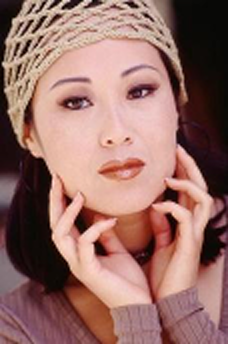

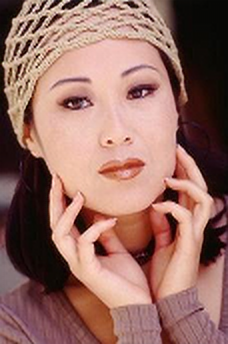

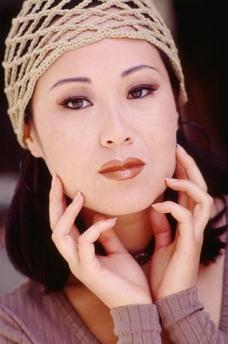

30.653542963942144


In [ ]:
ps1 = psnr_calc()
print(ps1)

In [ ]:
34.99243854909264

34.99243854909264

In [ ]:
model.save("/content/drive/My Drive/dataset/suparesthing/model2_FCN_FSRCNN.h5")